In [268]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
df = {'actuals' :[1,0,1,1,0,1,0,1,0,1], 
      'predictions' :[1,1,0,1,0,1,0,1,0,1],
      'score' :[0.9,0.5,0.4,0.7,0.35,0.60,0.3,0.45,0.2,0.8]}
df = pd.DataFrame(df)
print(df.shape)

(10, 3)


In [269]:
df

,actuals,predictions,score
0,1,1,0.90
1,0,1,0.50
2,1,0,0.40
3,1,1,0.70
4,0,0,0.35
5,1,1,0.60
6,0,0,0.30
7,1,1,0.45
8,0,0,0.20
9,1,1,0.80


In [270]:
cf_matrix = confusion_matrix(df['actuals'] , df['predictions'])
print(cf_matrix)

[[3 1]
 [1 5]]


In [271]:
TP = ((df['actuals'] == 1) & (df['predictions'] == 1)).sum()
TN = ((df['actuals'] == 0) & (df['predictions'] == 0)).sum()
FP = ((df['actuals'] == 0) & ( df['predictions'] == 1)).sum()
FN = ((df['actuals'] == 1) & ( df['predictions'] == 0)).sum()
print(f'TP: {TP}, FP: {FP}')
print(f'FN: {FN}, TN: {TN}')

TP: 5, FP: 1
FN: 1, TN: 3


In [272]:
sensitivity = TP/(TP+FN)
speficicity = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Sensitivity: {sensitivity}')
print(f'Speficicity: {speficicity}')


Sensitivity: 0.8333333333333334
Speficicity: 0.75


In [273]:
accuracy = (TP+TN) / (TP+TN+FP+FN)
precision = TP/(TP+FP)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Accuracy: 0.8
Precision: 0.8333333333333334


0    0.90
1    0.50
2    0.40
3    0.70
4    0.35
5    0.60
6    0.30
7    0.45
8    0.20
9    0.80
Name: score, dtype: float64


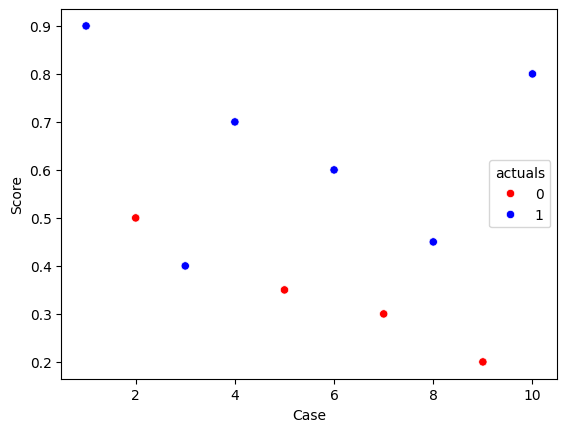

In [274]:
case = [1,2,3,4,5,6,7,8,9,10]
scatter = sns.scatterplot(x=case, y='score', data=df, hue='actuals', palette=['red', 'blue'])
print(df['score'])
plt.plot([0.5,10.5], [0.25, 0.25], '--', lw=1, label="Added Line", color = 'white') 
plt.text(1.5, 0.25, 'y = 0.25', ha='center', va='bottom', fontsize=10, color='white')
xlim = plt.xlim(0.5, 10.5)
xlabel = plt.xlabel('Case')
ylabel = plt.ylabel('Score')

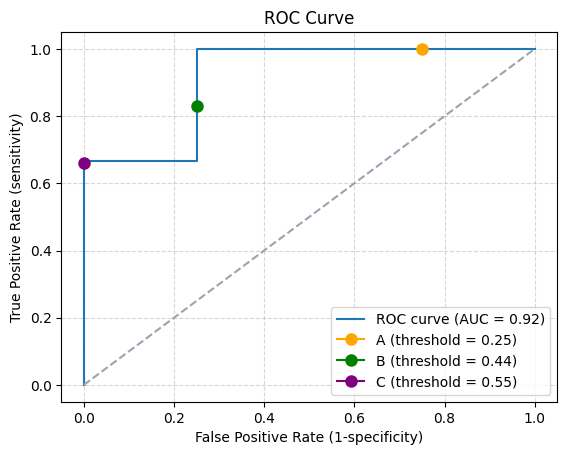

In [275]:
fpr, tpr, thresholds = roc_curve(df['actuals'], df['score'])
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot(0.75, 1,color = 'orange', marker='o', markersize=8, label='A (threshold = 0.25)')  # Add a point for the threshold
plt.plot(0.25, 0.83,color = 'green', marker='o', markersize=8, label='B (threshold = 0.44)')  # Add a point for the threshold
plt.plot(0, 0.66,color = 'purple', marker='o', markersize=8, label='C (threshold = 0.55)')  # Add a point for the threshold

plt.plot([0,1], [0,1], linestyle='--', color = '#9ca3af')  # random classifier line
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate (sensitivity)")
plt.title("ROC Curve")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


Bootstrap

   actuals  predictions  score
6        0            0   0.30
3        1            1   0.70
7        1            1   0.45
4        0            0   0.35
6        0            0   0.30
9        1            1   0.80
2        1            0   0.40
6        0            0   0.30
7        1            1   0.45
4        0            0   0.35
   actuals  predictions  score
3        1            1   0.70
7        1            1   0.45
7        1            1   0.45
2        1            0   0.40
5        1            1   0.60
4        0            0   0.35
1        0            1   0.50
7        1            1   0.45
5        1            1   0.60
1        0            1   0.50
   actuals  predictions  score
4        0            0   0.35
0        1            1   0.90
9        1            1   0.80
5        1            1   0.60
8        0            0   0.20
0        1            1   0.90
9        1            1   0.80
2        1            0   0.40
6        0            0   0.30
3       

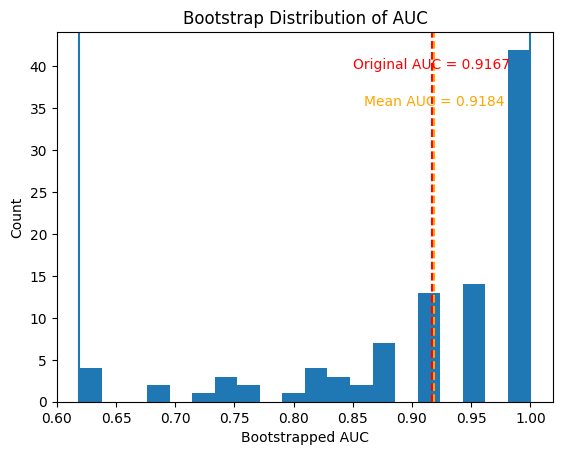

Original AUC: 0.917
95% CI: 0.619 - 1.0
0.9184013605442178
[1.         0.61904762 1.         0.9047619  0.91666667 0.75
 0.91666667 0.91666667 1.         1.         0.83333333 1.
 1.         0.95833333 1.         1.         0.95238095 0.80952381
 0.96       0.9047619  1.         0.875      0.95833333 0.95833333
 0.80952381 0.91666667 1.         0.875      1.         1.
 0.61904762 0.91666667 0.91666667 0.84       1.         1.
 0.8125     1.         0.95833333 1.         1.         1.
 1.         0.71428571 0.61904762 0.9047619  0.95833333 0.85714286
 1.         1.         1.         1.         0.96       0.91666667
 1.         1.         0.91666667 1.         0.91666667 1.
 0.91666667 0.95238095 0.75       1.         0.96       1.
 1.         0.75       0.95833333 0.79166667 1.         0.875
 0.88       0.76190476 1.         0.95833333 0.68       1.
 1.         0.61904762 0.95833333 1.         1.         0.875
 0.8125     1.         0.83333333 0.96       0.68       1.
 0.875      1.  

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Original AUC
original_auc = roc_auc_score(df['actuals'], df['score'])

# Bootstrap
n = 100
boot_aucs = []
np.random.seed(42)

for _ in range(n):
    sample = df.sample(n=len(df), replace=True)
    print(sample)
    
    # print("95% CI:", round(lower, 3), "-", round(upper, 3))
    # print(boot_aucs.mean())
    # print(sample.shape)
    # Skip samples that don't contain both classes
    if len(sample['actuals'].unique()) < 2:
        continue
    
    auc = roc_auc_score(sample['actuals'], sample['score'])
    boot_aucs.append(auc)

boot_aucs = np.array(boot_aucs)

# 95% Confidence Interval
lower = np.percentile(boot_aucs, 2.5)
upper = np.percentile(boot_aucs, 97.5)

# # Plot histogram
plt.figure()
plt.hist(boot_aucs, bins=20)
plt.axvline(original_auc, color='red', linestyle='--', label=f'Original AUC = {original_auc:.2f}')
plt.axvline(boot_aucs.mean(), color='orange', linestyle='--', label=f'Mean AUC = {boot_aucs.mean():.2f}')
plt.axvline(lower)
plt.axvline(upper)
plt.text(original_auc, plt.ylim()[1]*0.9, f'Original AUC = {original_auc:.4f}', color='red', ha='center')
plt.text(boot_aucs.mean(), plt.ylim()[1]*0.8, f'Mean AUC = {boot_aucs.mean():.4f}', color='orange', ha='center')
plt.xlabel("Bootstrapped AUC")
plt.ylabel("Count")
plt.title("Bootstrap Distribution of AUC")
plt.show()

print("Original AUC:", round(original_auc, 3))
print("95% CI:", round(lower, 3), "-", round(upper, 3))
print(boot_aucs.mean())
print(boot_aucs)